In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [16]:
df = pd.read_csv('data.csv')
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [10]:
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

In [11]:
df.shape

(891, 3)

In [14]:
df = df.dropna()

In [15]:
df.shape

(704, 3)

In [18]:
df[['Age']].tail()

,Age
886,27.0
887,19.0
888,NaN
889,26.0
890,32.0


In [19]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [21]:
df_zero = df[['Age']].fillna(0)
df_zero.tail()

,Age
886,27.0
887,19.0
888,0.0
889,26.0
890,32.0


In [26]:
df_mean = df[['Age']].fillna(int(df[['Age']].mean()))
df_mean.tail()

,Age
886,27.0
887,19.0
888,29.0
889,26.0
890,32.0


In [27]:
df_median = df[['Age']].fillna(int(df[['Age']].median()))
df_median.tail()

,Age
886,27.0
887,19.0
888,28.0
889,26.0
890,32.0


In [28]:
mean = df[['Age']].mean()
std = df[['Age']].std()
num = df[['Age']].isnull().sum()

In [29]:
rand = np.random.randint(mean-std,mean+std,size=num)

<AxesSubplot:>

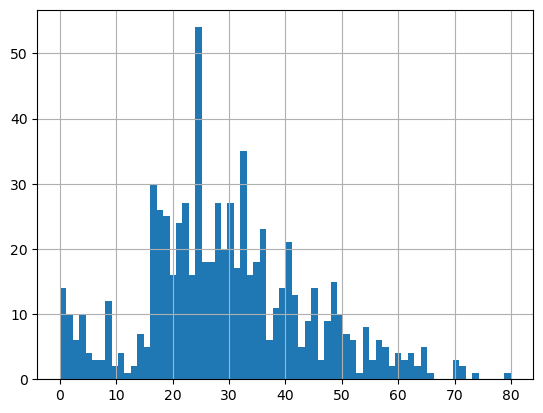

In [30]:
df['Age'].dropna().astype(int).hist(bins=70)

In [33]:
df['Age'][df['Age'].isnull()] = rand

C:\Users\yaku2\AppData\Local\Temp\ipykernel_25940\3891583883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = rand


In [34]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

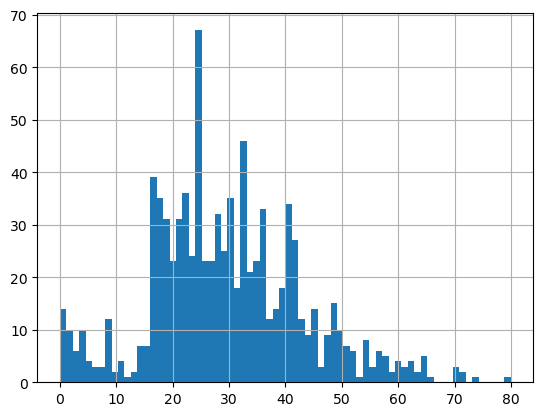

In [35]:
df['Age'].astype(int).hist(bins=70)

In [44]:
df[['Sex']].fillna(method='ffill')

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [47]:
pd.get_dummies(df['Sex']).drop('male',axis=1)

,female
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
mmscaler = MinMaxScaler(copy=True)

In [53]:
lim_min,lim_max = df['Age'].min(),df['Age'].max()

In [54]:
lim_min,lim_max

(0.42, 80.0)

In [56]:
mmscaler.fit(np.array([lim_min,lim_max]).reshape(-1,1))

MinMaxScaler()

In [55]:
np.array([lim_min,lim_max]).reshape(-1,1)

array([[ 0.42],
       [80.  ]])

In [60]:
mmscaler.transform(df[['Age']]).max()

C:\Users\yaku2\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1.0

In [61]:
df[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,40.0
889,26.0


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()

In [70]:
ss.fit_transform(df[['Age']])

1.0

In [84]:
df_wine = pd.read_csv('wine.csv')

In [85]:
df_wine.iloc[:,1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [88]:
_dfs = ss.fit_transform(df_wine.iloc[:,1:])

In [89]:
_dfs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [91]:
dfs = pd.DataFrame(_dfs,columns=df_wine.columns[1:])

In [92]:
dfs

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA()

In [95]:
pca.fit(dfs)

PCA()

In [97]:
feauture = pca.transform(dfs)

In [103]:
feauture = pd.DataFrame(feauture,columns =['PC{}'.format(x+1) for x in range(len(dfs.columns))])
feauture.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [99]:
['PC{}'.format(x+1) for x in range(len(dfs.columns))]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

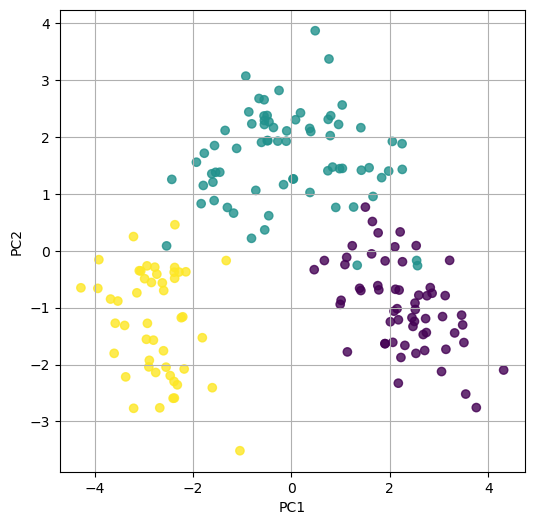

In [105]:
plt.figure(figsize=(6,6))
plt.scatter(feauture['PC1'],feauture['PC2'],alpha=0.8,c=df_wine['class'])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

In [109]:
X = feauture.iloc[:,:2]

In [111]:
y = df_wine.iloc[:,0]

In [165]:
pd.DataFrame(X)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0
...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8


In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [125]:
y_pred = lr.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_true = y_test,y_pred=y_pred)

0.9166666666666666

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knc = KNeighborsClassifier(n_neighbors=40)

In [154]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [155]:
y_pred=knc.predict(X_test)
y_pred

C:\Users\yaku2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 3], dtype=int64)

In [156]:
knc.score(X_test,y_test)

C:\Users\yaku2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9444444444444444

In [158]:
df_slump = pd.read_csv('slump.csv')
df_slump

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82
...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,49.17


In [160]:
X = df_slump.iloc[:,:7]
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0
...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8


In [171]:
y = df_slump.iloc[:,7:]
y

,Compressive Strength (28-day)(Mpa)
0,34.99
1,41.14
2,41.81
3,42.08
4,26.82
...,...
98,49.97
99,50.23
100,50.50
101,49.17


In [175]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [173]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
10,145.0,106.0,136.0,208.0,10.0,751.0,883.0
31,349.0,0.0,178.0,230.0,6.0,785.0,721.0
68,320.0,127.0,164.0,211.0,6.0,721.0,723.0
57,313.0,124.0,0.0,205.0,11.0,846.0,758.0
79,141.1,0.6,209.5,188.8,4.6,996.1,789.2
93,172.0,162.1,238.5,166.0,7.4,953.3,641.4
32,366.0,0.0,187.0,191.0,7.0,824.0,757.0
86,143.3,91.8,239.8,200.8,6.2,964.8,647.1
14,374.0,0.0,0.0,190.0,7.0,1013.0,730.0
80,140.1,4.2,215.9,193.9,4.7,1049.5,710.1


In [174]:
y_train.head()

,Compressive Strength (28-day)(Mpa)
10,26.02
31,43.95
68,46.36
57,29.63
79,30.43


In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [181]:
from sklearn.metrics import r2_score,mean_squared_error

In [182]:
y_pred = regressor.predict(X_test)

In [184]:
r2_score(y_test,y_pred)

0.8343195909006843

In [186]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.064410941512966